In this Notebook we want to try implementing the integer basis algorithm as proposed by Herbert's and Teresa's notes.
There are 3 Lemmas to understand and implement: 

#### 1) Lemma 3.1 (Parallel Vectors)

#### 2) Lemma 3.2 (Choice of Basis)

#### 3) Lemma 3.3 (Smallest Common Superlattice)

In [1]:
import random as rd
import numpy as np
import numpy.linalg as la
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# We start by a simple setup
# Generate four integer-valued vectors in $R^3$
# Three of those should already form a basis, the new one can be arbitrary
# Plot them

def gen_int_basis(d=3, a=5):
    # d is the dimension of the ambient space and the number of resulting vectors
    # a is the maximum length of a resulting vector in the sup norm
    basis = np.zeros((d,d))
    
    det = la.det(basis)
    counter = 0
    while det == 0:
        for i in range(d):
            basis[:,i] = gen_int_vec(d,a)
        det = la.det(basis)
        counter += 1
        if counter == 100:
            break # raise some error here
            
    return basis

def gen_int_vec(d=3, a=5):
    vec = np.zeros(d)
    for i in range(d):
        vec[i] = rd.randint(-a,a)
    """
    make sure that this does not return the zero vector!
    """
    return vec

def plot_basis_and_vec_3d(basis,vec,vec2=[],a=5,name1="new1",name2="new2"):
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    origin = np.zeros(3)
    
    eps = 1e-1
    
    # plot basis
    ax.quiver(origin,origin,origin, basis[0,:], basis[1,:], basis[2,:], color='blue')
    ax.text(basis[0,0],basis[1,0],basis[2,0]+eps, "b0", color='blue')
    ax.text(basis[0,1],basis[1,1],basis[2,1]+eps, "b1", color='blue')
    ax.text(basis[0,2],basis[1,2],basis[2,2]+eps, "b2", color='blue')
    
    # plot additional vector
    ax.quiver(0,0,0,vec[0],vec[1],vec[2], color="red")
    ax.text(vec[0],vec[1],vec[2]+eps, name1, color='red')
    
    if len(vec2)!=0:
        # plot second additional vector
        ax.quiver(0,0,0,vec2[0],vec2[1],vec2[2], color="orange")
        ax.text(vec2[0],vec2[1],vec2[2]+eps, name2, color='orange')
    
    # plot axis
    ax.plot([0,a+1,0,0,0,0],[0,0,0,a+1,0,0],[0,0,0,0,0,a+1], color="black")
    ax.text(a,0,0+eps, "x", color='black')
    ax.text(0,a,0+eps, "y", color='black')
    ax.text(0+eps,0,a, "z", color='black')
    
    ax.set_xlim([-a, a])
    ax.set_ylim([-a, a])
    ax.set_zlim([-a, a])
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    plt.show()

### Lemma 3.1 (Parallel Vectors). 
Let $Z \subset \mathbb Z^d$ be a sublattice with $dim Z = d$. Then for every
 $u \in \mathbb Z^d$, there exists a vector $v \in Z$ that is parallel to $u$.

In [3]:
# function that takes basis (which generates sublattice Z) and vector v
# outputs vector u as linear combination of basis elements, which is parallel to v
# also outputs or at least explicitely calculates the coefficients involved

In [4]:
def L31_parallel_vectors(basis,u):
    # function that takes basis (which generates sublattice Z) and vector v
    # outputs vector u as linear combination of basis elements, which is parallel to v
    # also outputs or at least explicitely calculates the coefficients involved
    
    G = basis
    Gi = la.inv(G)
    p = int(la.det(G))
    print("p=",p)
    up = p*Gi.dot(u) 
    c = [round(up[i]) for i in range(3)] # coefficients
    gcd = math.gcd(math.gcd(math.gcd(c[0],c[1]),c[2]),p)
    c = np.int32(np.array(c)/gcd)
    v = c[0]*basis[:,0] + c[1]*basis[:,1] + c[2]*basis[:,2]
    
    return v, c

In [5]:
basis = gen_int_basis()
u = gen_int_vec()
v,c = L31_parallel_vectors(basis,u)

p= -10


<IPython.core.display.Javascript object>


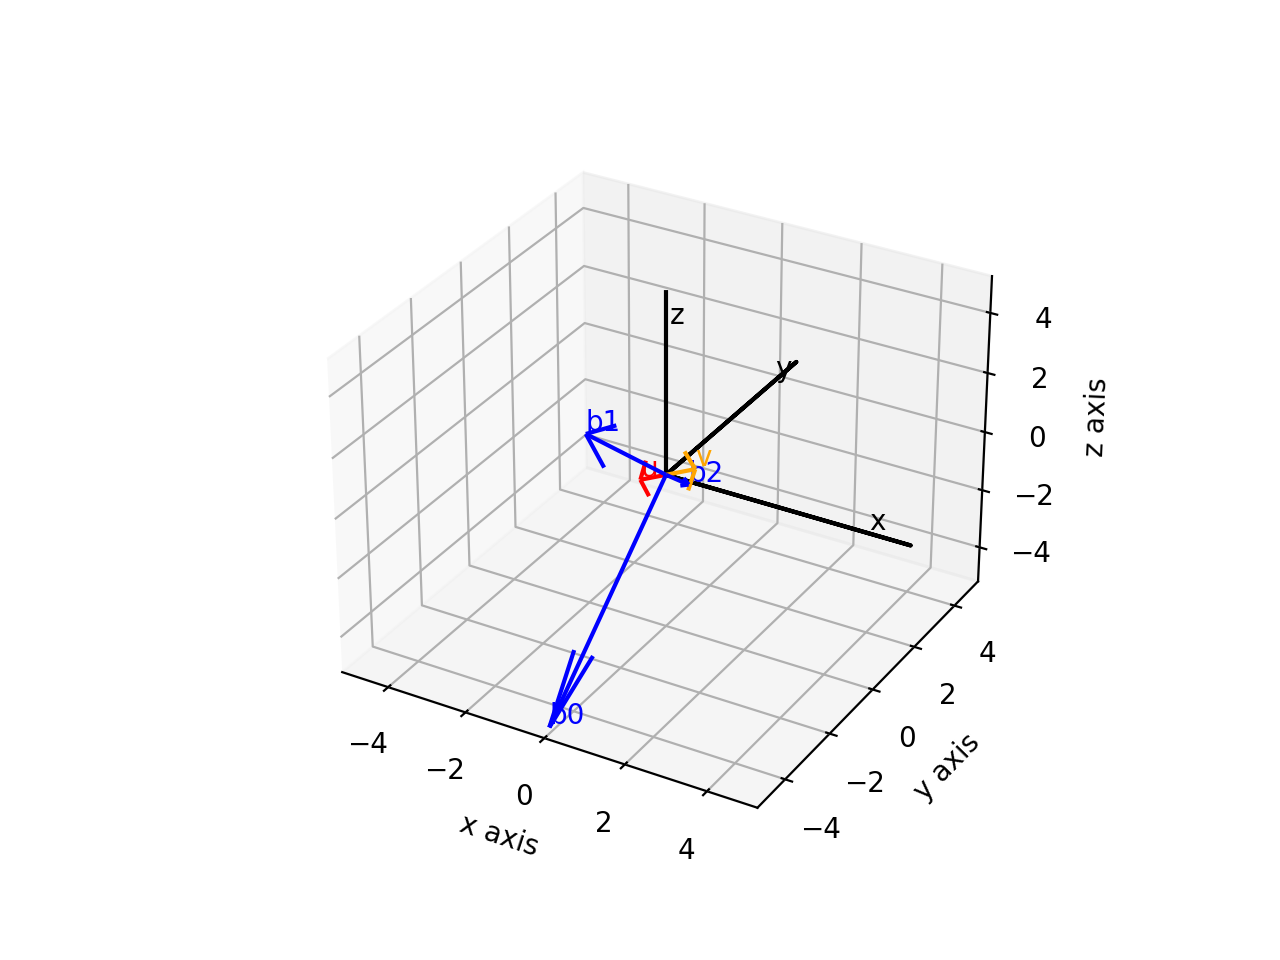

In [6]:
plot_basis_and_vec_3d(basis,u,v,name1="u",name2="v")

### Lemma 3.2 (Choice of Basis). 
For every primitive $u \in \mathbb Z^d$, there is a basis of $\mathbb Z^d$ including $u$.

### Alternative approach without numeric problems of projection

Projection is not ideal for numeric calculation. We have thus come up with the following: 

We start in 3d. We have a basis a,b,c and 1 additional vector u. This vector is the linearly dependant on the basis over R.

Next, we „project the basis to the plane orthogonal to u“. These gives new vectors a’, b’ and c'. For the next projection, we first need to determine which two of the projected basis vectors actually form a basis of the orthogonal complement, and which is the one to project along. 
For this we can look at the rank of the matrix formed by two of these vectors. If the rank is 2, we can pick these vectors, say a’, b’ as the basis, and the leftover vector c as the „projection“ vector. This is equivalent to asking if the rank of a, b, u is 2 or 3. 

NOTE: We still need a PRIMITIVE version of c for the Lemma 3.2 to hold. For this we need to hand it over to Lemma 3.1.

Once we have a 2d basis and projection vector, we „project the basis to the line orthogonal to c“, which is spanned by u x c. These two vectors are called a’’ and b’’. We now have a 1-dimensional problem. Here, to find a basis we need to find the gcd of these vectors. As we are only working with 3-d coordinates, this needs to be reformulated. The length of a’’ is (a,u x c) / |u x c|, similarly for b’’. If we are not dividing by |u x c|, then we get integer lengths. 
IDEA: If we take the gcd of these integer lengths by Euclid’s algorithms, we also get the coefficients for a’’ and b’’ involved to reach that gcd. The new basis vector will then be this linear combination of a’’ and b’’, scaled by 1/|u x c|. 

Translated into one dimension higher, we get a basis consisting of the primitive multiple of c’ and the corresponding linear combination of a’ and b’. 

Translated into 3-dimensions, we get a basis consisting of the primative u, the corresponding rescaling of c and the corresponding linear combination of a and b. 


In [97]:
# code from https://www.geeksforgeeks.org/python-program-for-basic-and-extended-euclidean-algorithms-2/

def gcdExtended(a, b): 
    # Base Case 
    if a == 0 :  
        return b,0,1

    gcd,x1,y1 = gcdExtended(b%a, a) 

    # Update x and y using results of recursive 
    # call 
    x = y1 - (b//a) * x1 
    y = x1 

    return gcd,x,y

def gcd3(a,b,c):
    return math.gcd(math.gcd(a,b),c)



def L32_choice_basis(basis, u, coeff):
    
    # We project orthogonally to vectors a', b' and c'.
    # Next, determine which pair forms basis of orthogonal complement. 
    
    test_mx = np.zeros((3,3))
    for i in range(3):
        test_mx[:,0] = basis[:,i%3]
        test_mx[:,1] = basis[:,(i+1)%3]
        test_mx[:,2] = u
        if la.det(test_mx)!=0:
            ind1 = i
            ind2 = (i+1)%3
            ind3 = (i+2)%3
            names = ("a","b","c")
            print(f"{names[ind1]}' and {names[ind2]}' are linearly independant in the orthognal complement.")
            # maybe calculate this numerically to check if this is true. 
            break
    # so we can take the projections of basis[:,ind1] and basis[:,ind2] as the new basis
    # for the new projection-vector, we need to find the parallel copy of basis[:,ind3] that lies 
    # in the span of this basis
    
    # however, for the next projection we don't need the parallel copy, so we can continue with basis[:,ind3]
    a = basis[:,ind1]
    b = basis[:,ind2]
    c = basis[:,ind3]
    uxc = np.cross(u,c)
    l1 = np.dot(a,uxc) #/ la.norm(uxc)
    l2 = np.dot(b,uxc) #/ la.norm(uxc)
    gcd,x,y = gcdExtended(l1,l2)
    
    # we now have everything for the new basis
    vec1 = u
    vec2 = (x*a + y*b) #/ la.norm(uxc) # do we actually need to divide by the norm??
    vec3 = c # actually a rescaled version of c!!!
    
    # rescaling c?
    sigma = gcd3(coeff[0],coeff[1],coeff[2])
    #print("scaling by",-coeff[ind3]/ sigma )
    vec3 = vec3 * (-coeff[ind3]/ sigma )
    #print("Warning: the second basis vector actually needs to be rescaled!")
    return np.transpose(np.array([vec1,vec2,vec3]))

In [100]:
#basis = gen_int_basis()
#u = gen_int_vec()
#v,c = L31_parallel_vectors(basis,u)
print(f"""
\033[1mExample\033[0m
The basis is given by vectors a={basis[:,0]}, b={basis[:,1]} and c={basis[:,2]}.
The additional vector is u={u}.
The vector v, which is parallel to u and lies in the original sublattice is v={v}. 
It can be written as the linear combination

                v = {c[0]}*a + {c[1]}*b + {c[2]}*c .
""")

print(f"""
Next, we want to create a larger sublattice, which means finding a basis that contains v. 
For this we use L32_choice_basis(). 
After the first projection, we find that:
""")
new_basis = L32_choice_basis(basis, v, c)
print(f"""The new basis vectors are:
      a_new = {new_basis[:,0]}
      b_new = {new_basis[:,1]}
      c_new = {new_basis[:,2]}""")


Example
The basis is given by vectors a=[4. 4. 0.], b=[-1.  5.  4.] and c=[ 2. -1.  3.].
The additional vector is u=[ 0.  3. -4.].
The vector v, which is parallel to u and lies in the original sublattice is v=[  -2.  355. -477.]. 
It can be written as the linear combination

                v = 68*a + -12*b + -143*c .


Next, we want to create a larger sublattice, which means finding a basis that contains v. 
For this we use L32_choice_basis(). 
After the first projection, we find that:

a' and b' are linearly independant in the orthognal complement.
The new basis vectors are:
      a_new = [  -2.  355. -477.]
      b_new = [25. 19. -4.]
      c_new = [ 286. -143.  429.]


In [94]:
v,c

(array([  -2.,  355., -477.]), array([  68,  -12, -143], dtype=int32))

In [89]:
l=0
m=-7/1000
n=0
l*new_basis[:,0] + m*new_basis[:,1] + n*new_basis[:,2]

array([-2.002,  1.001, -3.003])